### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
import tensorflow as tf
tf.set_random_seed(42)

In [4]:
tf.__version__

'1.12.0'

### Collect Data

In [5]:
import keras

Using TensorFlow backend.


In [6]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [7]:
print(testY[0:5])

[9 2 1 1 6]


In [51]:
print(trainX.head(5))

SyntaxError: ignored

### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [9]:
print(trainY.shape)
print(trainX.shape)

(60000, 10)
(60000, 28, 28)


In [10]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

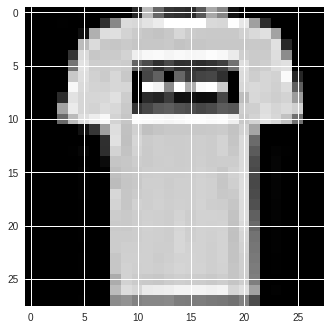

In [93]:
import numpy as np
import matplotlib.pyplot as plt

# fig = plt.figure(figure(10,1))
# columns = 10
# rows = 1
# for i in range(1, ccolumns*rows+1):
#   grid_data = trainX[i-1].reshape(28,28)
#   fig.add_subplot(rows,columns,i)
#   plt.imshow(grid_data,interpolation = "none", cmap = "gray")
# plt.show()
plt.imshow(trainX[0],cmap = 'gray')

# for i in range(0,9,1):
#  plt.imshow(trainX[i], cmap = 'gray')

# count = 0
# while (count < 9):     
#     count = count + 1
#     print(plt.imshow(trainX[count], cmap = 'gray')) 
# else: 
#     print("In Else Block") 

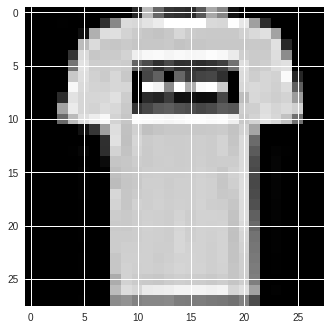

In [94]:
plt.imshow(trainX[1],cmap = 'gray')

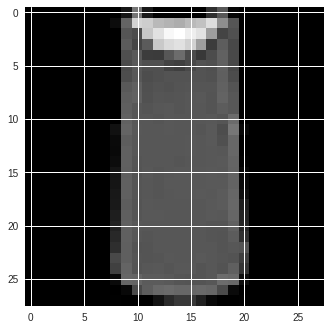

In [95]:
plt.imshow(trainX[2],cmap = 'gray')

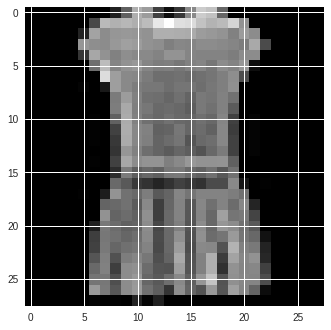

In [96]:
plt.imshow(trainX[3],cmap = 'gray')

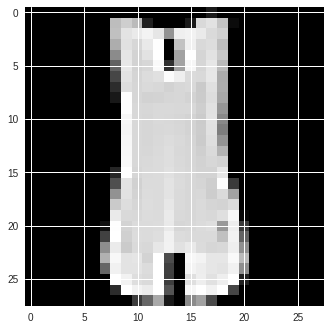

In [97]:
plt.imshow(trainX[4],cmap = 'gray')

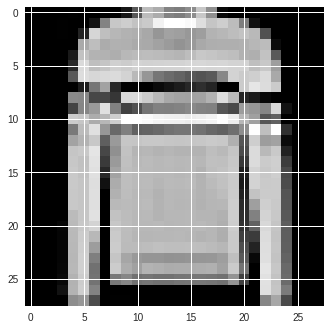

In [98]:
plt.imshow(trainX[5],cmap = 'gray')

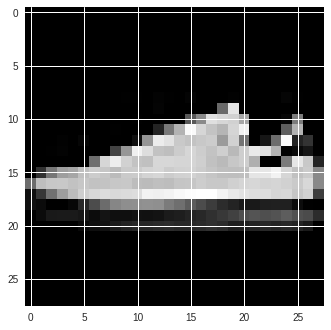

In [99]:
plt.imshow(trainX[6],cmap = 'gray')

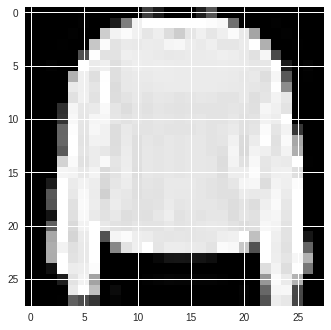

In [100]:
plt.imshow(trainX[7],cmap = 'gray')

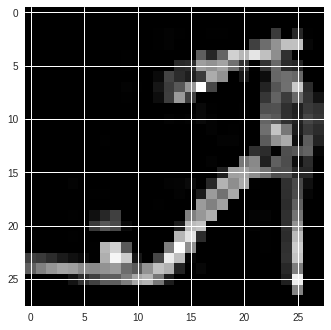

In [101]:
plt.imshow(trainX[8],cmap = 'gray')

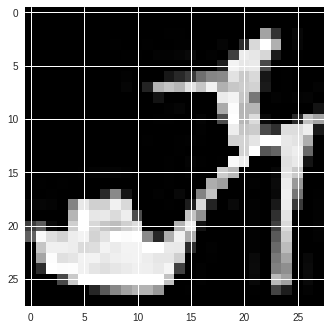

In [102]:
plt.imshow(trainX[9],cmap = 'gray')

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
#model.add(tf.keras.layers.BatchNormalization())

In [0]:

#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200, activation='relu'))

In [0]:
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='relu'))

In [0]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

#Compile the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model using model.fit()

In [46]:
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=30,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 7s 122us/step - loss: 0.4822 - acc: 0.8274 - val_loss: 0.4213 - val_acc: 0.8500
Epoch 2/30
60000/60000 [==============================] - 7s 117us/step - loss: 0.3676 - acc: 0.8661 - val_loss: 0.3964 - val_acc: 0.8562
Epoch 3/30
60000/60000 [==============================] - 7s 121us/step - loss: 0.3327 - acc: 0.8771 - val_loss: 0.3561 - val_acc: 0.8721
Epoch 4/30
60000/60000 [==============================] - 7s 124us/step - loss: 0.3021 - acc: 0.8881 - val_loss: 0.3603 - val_acc: 0.8713
Epoch 5/30
60000/60000 [==============================] - 7s 122us/step - loss: 0.2841 - acc: 0.8961 - val_loss: 0.3564 - val_acc: 0.8745
Epoch 6/30
60000/60000 [==============================] - 7s 121us/step - loss: 0.2701 - acc: 0.9001 - val_loss: 0.3396 - val_acc: 0.8786
Epoch 7/30
60000/60000 [==============================] - 7s 122us/step - loss: 0.2556 - acc: 0.9044 - val_loss: 0.3311 - 

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
#Normalize the data
model.add(tf.keras.layers.BatchNormalization())


#Add 1st hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))


#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))


#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

### Execute the model

In [108]:
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=30,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 11s 185us/step - loss: 2.0615 - acc: 0.7067 - val_loss: 1.6251 - val_acc: 0.8994
Epoch 2/30
60000/60000 [==============================] - 10s 170us/step - loss: 0.8023 - acc: 0.9747 - val_loss: 0.5080 - val_acc: 0.8973
Epoch 3/30
60000/60000 [==============================] - 10s 170us/step - loss: 0.2261 - acc: 0.9658 - val_loss: 0.5173 - val_acc: 0.8837
Epoch 4/30
60000/60000 [==============================] - 11s 179us/step - loss: 0.1913 - acc: 0.9602 - val_loss: 0.5148 - val_acc: 0.8858
Epoch 5/30
60000/60000 [==============================] - 10s 172us/step - loss: 0.2062 - acc: 0.9539 - val_loss: 0.5010 - val_acc: 0.8856
Epoch 6/30
60000/60000 [==============================] - 10s 172us/step - loss: 0.2014 - acc: 0.9523 - val_loss: 0.4882 - val_acc: 0.8896
Epoch 7/30
60000/60000 [==============================] - 10s 171us/step - loss: 0.2001 - acc: 0.9512 - val_loss: 0.

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.01)

#Compile the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [59]:
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=30,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 10s 163us/step - loss: 0.0849 - acc: 0.9712 - val_loss: 0.4785 - val_acc: 0.8941
Epoch 2/30
60000/60000 [==============================] - 9s 153us/step - loss: 0.0717 - acc: 0.9755 - val_loss: 0.4816 - val_acc: 0.8977
Epoch 3/30
60000/60000 [==============================] - 9s 153us/step - loss: 0.0705 - acc: 0.9764 - val_loss: 0.4975 - val_acc: 0.8972
Epoch 4/30
60000/60000 [==============================] - 9s 154us/step - loss: 0.0678 - acc: 0.9778 - val_loss: 0.5098 - val_acc: 0.8951
Epoch 5/30
60000/60000 [==============================] - 9s 155us/step - loss: 0.0659 - acc: 0.9779 - val_loss: 0.5082 - val_acc: 0.8954
Epoch 6/30
60000/60000 [==============================] - 9s 154us/step - loss: 0.0614 - acc: 0.9797 - val_loss: 0.5016 - val_acc: 0.9010
Epoch 7/30
60000/60000 [==============================] - 9s 158us/step - loss: 0.0655 - acc: 0.9782 - val_loss: 0.5068 -

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

## Review model

In [60]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 784)               3136      
_________________________________________________________________
dense_6 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
_________________________________________________________________
batch_normalization_3 (Batch (None, 10)                40        
_________________________________________________________________
batch_normalization_4 (Batch (None, 10)                40        
__________

### Run the model

In [103]:

#Model prediction
prediction = model.predict(testX[0:1])

#Print prediction
print(prediction[0])

[1.91651043e-06 3.38642326e-06 1.97777149e-06 7.68339930e-07
 7.74168200e-07 2.88605443e-05 2.48288461e-06 1.15166724e-04
 3.65046367e-06 9.99840975e-01]


In [104]:
#Get predicted number with highest probability
predicted_number = np.argmax(prediction[0])

#Print the number
print(predicted_number)

9


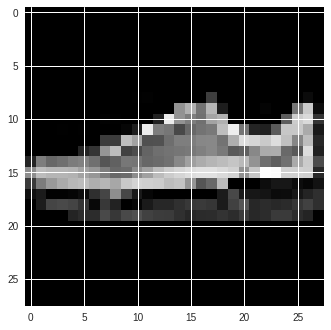

In [105]:
# So the predicted image is :-

plt.imshow(testX[9],cmap='gray')